# Transformadas de Fourier

## Transformadas rápidas de Fourier en Python

La transformada de Fourier es una herramienta importante en física e ingeniería, y los paquetes científicos de Python tienen varias rutinas para trabajar con ellas. Tanto **NumPy** como **SciPy** tienen una interface a la biblioteca FFTPACK [http://www.netlib.org/fftpack/] que ha sido probada y optimizada durante muchos años. La biblioteca FFTW ("Fastest Fourier Transform in the West.") [http://fftw.org], escrita en C, con interfaces en C y Fortran es una de las más rápidas y puede accederse en Python mediante el paquete PyFFTW [https://github.com/hgomersall/pyFFTW].

In [46]:
import numpy as np
# Notar acá el backend a utilizar: es diferente!
%matplotlib notebook
import matplotlib.pyplot as plt
#plt.style.use('presentation')


Vamos a calcular los coeficientes de la serie de Fourier de una dada función, evaluada en un conjunto de puntos equiespaciados.

En **Numpy**, la función `np.fft.fft()` realiza la transformada discreta directa y la función `np.fft.ifft()` la transformada inversa. Veamos un poco qué son y cómo se calculan.

**La transformada discreta directa** de una función $f(x)$ evaluada en $N$ puntos $x_{n}=2 \pi n/N$, con $y_{n} = f(x_{n})$ para $n=0,1,\dots,N-1$, está dada por:

$$Y_{k} = \sum_{n=0}^{N-1} y_n \cdot e^{-i~2\pi~k~n~/~N}$$

y **la transformada discreta inversa** se define como:
$$y_{n} = \frac{1}{N}\sum_{k=0}^{N-1} Y_k e^{i~2\pi~k~n~/~N}$$

La transformada rápida de Fourier no se realiza aplicando directamente esta fórmula por razones de costo computacional (ya que el número de operaciones aumenta con el número de puntos como $N^{2}$). 

En 1965 JW Cooley y John Tukey publicaron un trabajo [Cooley, James W., and John W. Tukey, 1965, “An algorithm for the machine calculation of complex Fourier series,” Math. Comput. 19: 297-301.] donde detallan un método que crece como $N \log(N)$. 

Esta es una mejora importante: Si aumentamos el número de puntos en $1000$, el tiempo aumenta en un factor del orden de $10^{6}$ en un caso y en aproximadamente en $7000$ en el otro.

### Ejemplo: funciones senoidales

<IPython.core.display.Javascript object>


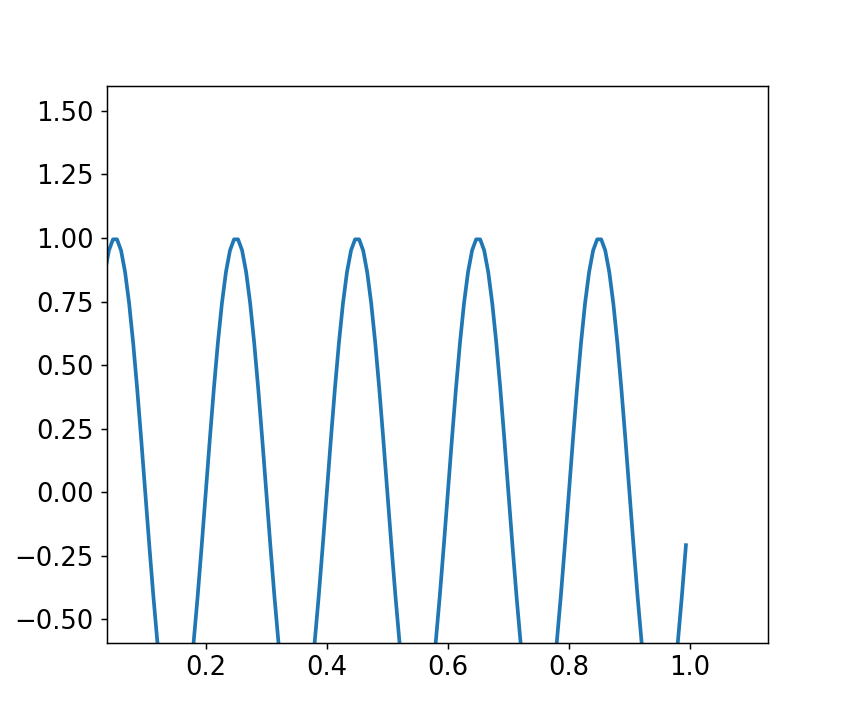

In [47]:
Fs = 150.0  # rate de muestra
Ts = 1.0 / Fs  # intervalo de muestra
t = np.arange(0, 1, Ts)  # tiempo

ff = 5   # frecuencia

# Una función cuya T.F es muy simple
y = np.sin(2 * np.pi * ff * t)
fig1= plt.figure('funcion')
plt.plot(t, y)

Acá, además de graficar los datos correspondientes a una función seno, mostramos una característica nueva de un tema que sólo nombramos brevemente. 

Al agregar la línea `%matplotlib notebook` le estamos diciendo a matplotlib que, al convertir los objetos de graficación (figuras, ejes, etc) utilice un backend especial, que sólo está disponible cuando usamos las *notebooks*.  Esta opción le da interactividad a los gráficos en la celda, hasta que la terminamos explícitamente, con el botón en el extremo superior derecho.

Volvamos al backend `inline`:

In [3]:
%matplotlib inline

El gráfico muestra algo que ya sabíamos. Una función sinusoidal se ve como una onda que se repite, en este caso con una frecuencia $\nu = 5$.

Como sabemos que es una función periódica, podemos escribirla con muy pocos datos como una señal que se repite con una cierta frecuencia. Eso es lo que nos da exactamente la transformada de Fourier:

In [4]:
# Calculamos la transformada de Fourier
Y = np.fft.fft(y)
print(Y.shape)

(150,)


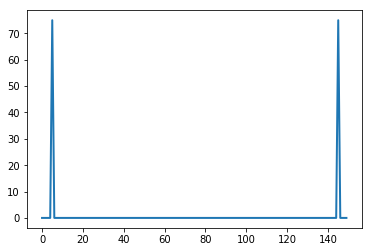

In [5]:
fig1= plt.figure()
plt.plot(np.abs(Y))

Notemos que en el eje $x$ tenemos valores que van entre $0$ y $149$ correspondientes a la cantidad de valores que hay en `Y` (los índices del array).

Esto se debe a que para calcular la transformada de Fourier, el intervalo real que se subdivide, sólo es relevante para obtener los valores de $f_{n}$, mientras que en la exponencial puede absorberse en la frecuencia.

**Numpy** y **Scipy** tienen la función `fftfreq` para calcular la frecuencia desde el número de puntos y el conjunto de puntos en "tiempo".

In [6]:
n = len(y)
n2 = range(n // 2)
frq = np.fft.fftfreq(n, d=Ts)   # frecuencias

Text(0.5,0,'Frecuencias [Hz]')

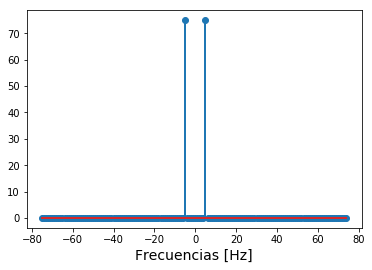

In [7]:
fig2= plt.figure()
plt.stem(frq, np.abs(Y))
plt.xlabel('Frecuencias [Hz]')

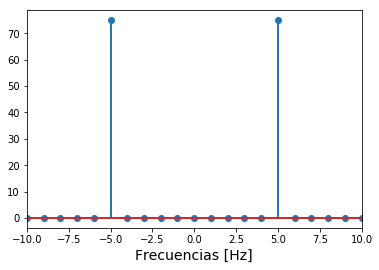

In [8]:
fig3 = plt.figure()
plt.stem(frq, np.abs(Y))
plt.xlabel('Frecuencias [Hz]')
plt.xlim((-10,10));

Como vemos, hay claramente dos frecuencias que contribuyen, una negativa y una positiva. Las amplitudes son iguales (valor absoluto) pero por supuesto los coeficientos son imaginarios y de signos opuestos y corresponden a frecuencias $\pm \omega$ ya que:
$$ \sin(\omega t) = \frac{e^{i \omega t} - e^{-i \omega t}}{2 i}$$


In [9]:
Y.real.min(), Y.imag.min(), Y.real.max(), Y.imag.max()      # Coeficientes máximos

(-1.6993874055479195e-14, -75.0, 3.1825973452412336e-14, 75.00000000000001)

In [10]:
# La parte real de todos los coeficientes son esencialmente nulos
np.allclose(Y.real, 0)

True

In [11]:
# Las frecuencias correspondientes a los valores de coeficientes máximos:
frq[[Y.imag.argmin(), Y.imag.argmax()]]

array([ 5., -5.])

(-10, 10)

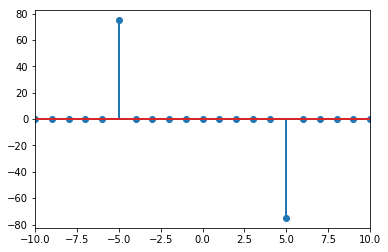

In [13]:
fig5 = plt.figure()
plt.stem(frq, Y.imag)
plt.xlim( (-10, 10) )

Debido a que para funciones reales los coeficientes correspondientes a frecuencias negativas y positivas están relacionados simplemente, es usual en estos casos graficar sólo las positivas:

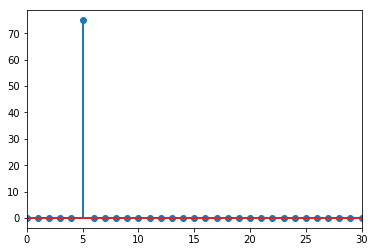

In [14]:
Y = Y[n2]
frq = frq[n2]
fig5 = plt.figure()
plt.stem(frq, np.abs(Y))
plt.xlim((0,30));

Veamos un ejemplo muy similar, pero con una suma de funciones senoidales:

In [15]:
# Creamos y graficamos la función
Fs = 512  # rate de muestra
Ts = 1.0 / Fs  # intervalo de muestra
t = np.arange(0, 1, Ts)  # tiempo
ff = 5   # frecuencia
y = np.sin(2 * np.pi * ff * t) + 0.5 * np.sin(2 * np.pi * 2 * ff * t)


n = len(y)
n2 = range(n // 2)
Y = np.fft.fft(y)               # fft directa


Ahora, con la nueva función (la transformada de Fourier) evaluada en `n` puntos podemos calcular la **Antitransformada**

In [16]:
y2 = np.fft.ifft(Y)             # fft inversa

y podemos graficarlos (usando para las transformadas sólo la parte positiva):

In [17]:
Y = Y[n2]                         # Sólo nos quedamos con los positivos
frq = np.fft.fftfreq(n, d=Ts)[n2] # Sólo frecuencias positivas

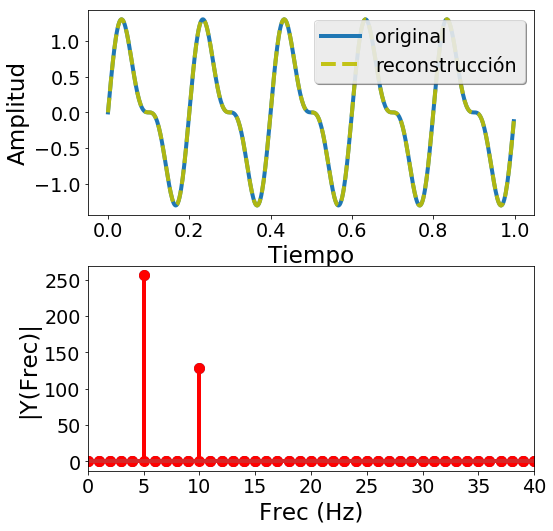

In [18]:
# Figuras
with plt.style.context('presentation'):
  fig, ax = plt.subplots(2, 1, num='fft-2', figsize=(8,8))
  # Figura superior
  ax[0].plot(t, y, label="original")
  ax[0].plot(t, np.real_if_close(y2), '--y', alpha=0.9, label='reconstrucción')
  ax[0].set_xlabel('Tiempo')
  ax[0].set_ylabel('Amplitud')
  ax[0].legend(loc='best')
  # Figura inferior
  ax[1].stem(frq, np.abs(Y), 'r')  # Graficamos el espectro
  ax[1].set_xlabel('Frec (Hz)')
  ax[1].set_ylabel('|Y(Frec)|')
  ax[1].set_xlim((0,40))
  
  plt.subplots_adjust(bottom=0.15, hspace=0.25) # Ajustamos los espacios

### Ejemplo: Transformación de una gaussiana

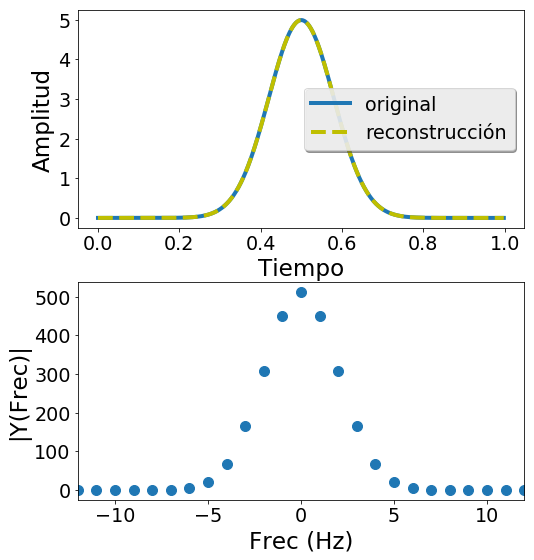

In [19]:
from scipy import stats
from scipy import fftpack

# Evaluamos la función (gaussiana) en una grilla

Fs = 512  # rate de muestra
Ts = 1.0 / Fs  # intervalo de muestra
t = np.arange(0, 1, Ts)  # tiempo
y = stats.norm.pdf(t, loc=0.5, scale=.08)

n = len(y)

Y = fftpack.fft(y)  # fft directa
y2 = fftpack.ifft(Y)  # fft inversa
frq = fftpack.fftfreq(n, d= Ts)

fsize = (8, 8)
with plt.style.context('presentation'):
  fig, ax = plt.subplots(2, 1, num='fft-3', figsize=fsize)
  ax[0].plot(t, y, label="original")
  ax[0].plot(t, np.real_if_close(y2), '--y', label='reconstrucción')
  ax[0].set_xlabel('Tiempo')
  ax[0].set_ylabel('Amplitud')
  ax[0].legend(loc='best')
#
  ax[1].plot(frq, np.abs(Y), 'o')  # Graficamos el espectro
  ax[1].set_xlabel('Frec (Hz)')
  ax[1].set_ylabel('|Y(Frec)|')
  ax[1].set_xlim( (-12,12) )
  plt.subplots_adjust(bottom=0.1, hspace=0.25)

**Algunos puntos a notar**

- Usamos la transformada de Fourier `fft()` de `scipy.fftpack`. El resultado es igual al utilizar la tranformada de `numpy.fft`. Si bien las funcionalidades de ambos módulos no son exactamente iguales, en este caso ambos utilizan las funciones en Fortran de FFTPACK [http://www.netlib.org/fftpack/]
- Si usamos el argumento `norm = 'ortho'` la normalización de la transformada de Fourier y de la antitransformada serán $1/\sqrt{N}$ (simétrica).
- La antitransformada de la transformada da la función original, tal como se espera
- La función `np.fftfreq()` da un *array* con las frecuencias de muestra de la FFT.
- Tanto las funciones `fft()` como `fftfreq()` devuelven valores correspondientes a los valores positivos de frecuencias en las primeras N/2 posiciones y las negativas a continuación:

```python
>>> np.fft.fftfreq(10)
array([ 0. ,  0.1,  0.2,  0.3,  0.4, -0.5, -0.4, -0.3, -0.2, -0.1])
```

### Transformaciones de funciones reales

Si las funciones son reales, entonces los coeficientes de la fft son simétricamente hermíticos; los coeficientes correspondientes a frecuencias negativas son las complejas conjugadas de los correspondientes a las frecuencias positivas, y por lo tanto no es necesario calcularlos. Para estos casos, los módulos `np.fft` y `scipy.fftpack` presentan funciones particulares `rfft()` y `rfftfreq()`.

**Notar** que el output de las dos rutinas es diferente.

Veamos cómo utilizarlo para el caso de la distribución gaussiana

In [20]:
Y2= np.fft.rfft(y)
f2= np.fft.rfftfreq(n,d=Ts)
y2= np.fft.irfft(Y2)            # Calculamos la inversa

In [21]:
#plt.style.use('presentation')

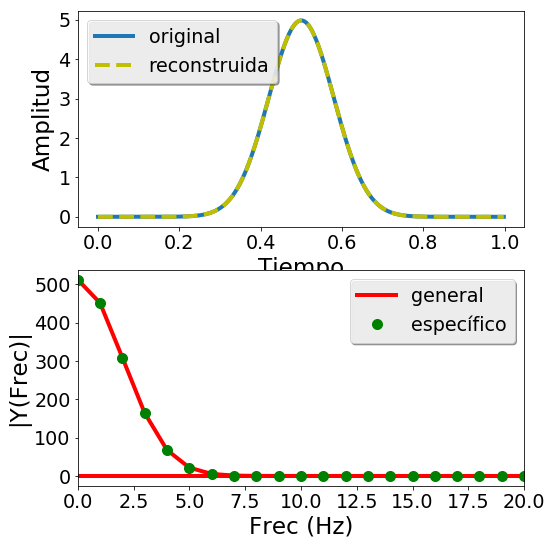

In [22]:
fsize = (8, 8)
with plt.style.context('presentation'):
  fig, ax = plt.subplots(2, 1, num='fft-4', figsize=fsize)
  ax[0].plot(t, y, label='original')
  ax[0].plot(t, np.abs(y2),'--y', label='reconstruida')
  ax[0].set_xlabel('Tiempo')
  ax[0].set_ylabel('Amplitud')
  ax[0].legend(loc='best')
  
  ax[1].plot(frq, np.abs(Y), '-r',label='general')  # Algoritmo general
  ax[1].plot(f2, np.abs(Y2), 'og', label='específico')  # Específico para input real
  ax[1].set_xlabel('Frec (Hz)')
  ax[1].set_ylabel('|Y(Frec)|')
  ax[1].legend(loc='best')
  ax[1].set_xlim((0,20))

In [24]:
Y.shape, Y2.shape

((512,), (257,))

## Aplicación: Análisis de audio

Como aplicación vamos a analizar un archivo de audio.


Antes de empezar, describamos la función `Audio` definida en el módulo `display` de `Ipython`. Este módulo permite escuchar audios directamente desde el *notebook* de **Ipython**:

In [25]:
from IPython.display import Audio

In [26]:
# Generamos un audio, como un array (de numpy)
framerate = 44100
t = np.linspace(0,5,framerate*6)
data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
Audio(data,rate=framerate)

Además, usando **Scipy** podemos leer un archivo de audio *standard* usando wavfile

In [27]:
# Definimos donde está el archivo de audio
from os.path import join
pardir = '/home/fiol/trabajo/clases/pythons/clases-python/'
fname1 = 'steam-train-whistle.wav'
fname2 = 'train_hits_guy.wav'
soundfile = join(pardir, 'data/',fname1)


In [32]:
Audio(soundfile)

Ahora, vamos a analizar este archivo. Lo leemos con la función `wavfile`, y graficamos su contenido

In [28]:
from scipy.io import wavfile
import scipy.fftpack as sfft

In [29]:
rate, audio = wavfile.read(soundfile)
print('Rate:', rate)
N, ch = audio.shape
print('Longitud: {}\nCanales: {}'.format(N, ch))


Rate: 44100
Longitud: 276858
Canales: 2


Como vemos, el archivo original tiene dos componentes (dos canales: stereo).
Podemos quedarnos con uno solo, o simplemente podemos promediar los dos canales.

Además, la duración del audio en segundos va a estar dada por el número de puntos, dividido por el rate (cuantos puntos por segundo hay)

In [30]:
audio1 = np.mean(audio, axis=1)
duracion = N / rate
Ts = np.arange(N)/rate
print('Audio length: {:.1f} seconds'.format(duracion))

Audio length: 6.3 seconds


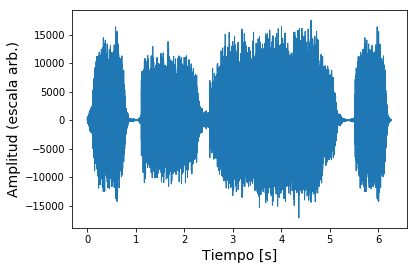

In [31]:
# Graficamos la señal
f, ax = plt.subplots()
ax.plot(Ts, audio1, lw=1)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud (escala arb.)');

Este gráfico nos da una idea de la variación de la intensidad del sonido en los distintos momentos de tiempo, pero esta no nos da una imagen completa de qué escucharíamos. En particular, no nos dice nada del tono. Una manera de obtener información sobre esto es usar la FFT, como vimos en los ejemplos anteriores:

/usr/lib64/python3.7/site-packages/numpy/fft/helper.py:162: RuntimeWarning: divide by zero encountered in true_divide
  val = 1.0 / (n * d)
/usr/lib64/python3.7/site-packages/numpy/fft/helper.py:169: RuntimeWarning: invalid value encountered in multiply
  return results * val


Text(0,0.5,'Amplitud')

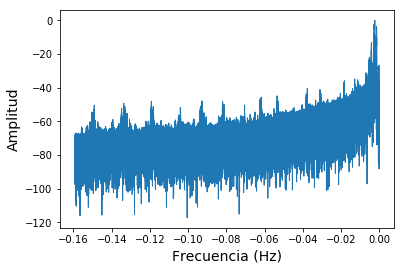

In [33]:
Y = sfft.fft(audio1)
frq = sfft.fftfreq(N, d= Ts)
Y = Y[N//2+1:]
frq = frq[N//2+1:]
fig, ax = plt.subplots()
ax.plot(frq, 20*np.log10(np.abs(Y)/np.abs(Y).max()), lw=1)
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Amplitud')

Todavía no es satisfactorio porque si bien nos da información sobre las frecuencias, perdimos toda información sobre la evolución temporal.

La solución a eso es realizar un espectrograma, que consiste en tomar franjas de tiempo, y analizar la distribución de frecuencias de cada una de ellas.

Para eso vamos a elegir franjas de `M = 1024` puntos, que se superpongan en `100`:

"![](figuras/elsp_windowing.png)"

En este caso usamos una función del paquete `skimage` para obtener las franjas.

In [34]:
from skimage.util import view_as_windows

M = 1024
overlap = 100

franjas = view_as_windows(audio1, window_shape=(M,), step=100)

print('Tenemos {} pedazos de longitud {} '.format(*franjas.shape))

Tenemos 2759 pedazos de longitud 1024 


/usr/lib64/python3.7/site-packages/skimage/util/shape.py:255: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr_in[slices].strides


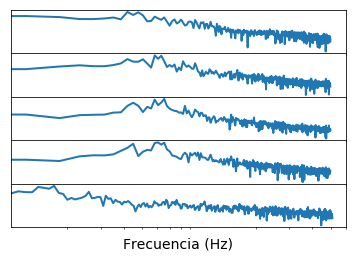

In [35]:
# Muestreo de franjas
fig, ax = plt.subplots(nrows=5)
for j,ff in enumerate(franjas[6::640]):
  Y = sfft.fft(ff)
  Y = Y[:len(Y)//2]
  ax[j].loglog(np.abs(Y))
  ax[j].set_xticks([])
  ax[j].set_yticks([])

plt.xlim((10,600))
plt.xlabel('Frecuencia (Hz)');
plt.subplots_adjust(wspace=0, hspace=0)


Un problema que aparece cuando hacemos esta ["transformada de Fourier corta"](https://en.wikipedia.org/wiki/Short-time_Fourier_transform), es que pueden aparecer efectos espurios debido al corte abrupto que hacemos en cada franja. Una manera usual de resolver este problema es crear ventanas que se anulan suavemente y multiplicarlas por ella.
De esta manera, realizamos la transformada de Fourier corta con una ventana:
$$
X(\tau ,\omega )=\int _{-\infty }^{\infty }x(t)w(t-\tau )e^{-j\omega t}\,dt
$$

El modo en que se elige la función que realiza la ventana es arbitrario, pero han sido propuestas, y se usan varias funciones. **Numpy** tiene definidas algunas de ellas (funciones de Hanning, Hamming, Blackman, Bartlett y Kaiser). La más simple es la función de Bartlett, que es una función triangular:
$$
w(n) = \frac{2}{M-1} \left( \frac{M-1}{2} - \left|n - \frac{M-1}{2}\right| \right)
$$

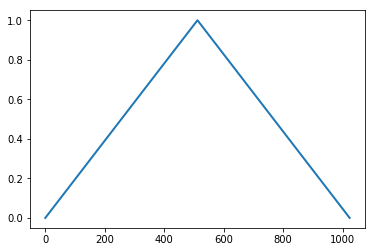

In [36]:
plt.plot(np.bartlett(M+1))

Usaremos la función de Hanning, que es más suave, y está definida como:
$$
w(n) = 0.5 - 0.5cos\left(\frac{2\pi{n}}{M-1}\right) \qquad 0 \leq n \leq M-1
$$

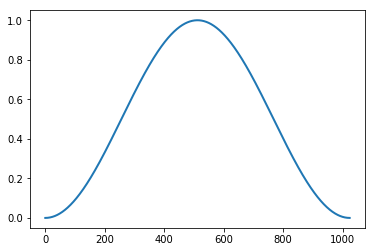

In [37]:
win = np.hanning(M + 1)
plt.plot(win)

In [38]:
wfranjas = np.transpose(franjas* win[:-1])
print('Shape of `wfranjas`:', wfranjas.shape)


Shape of `wfranjas`: (1024, 2759)


Podemos calcular la transformada de Fourier para todas las franjas en forma simultánea:

In [39]:
spectrum = sfft.fft(wfranjas, axis=0)[:M // 2 + 1:-1]
S = np.abs(spectrum)
# Convertimos a decibeles 
S = 20 * np.log10(S / np.max(S))

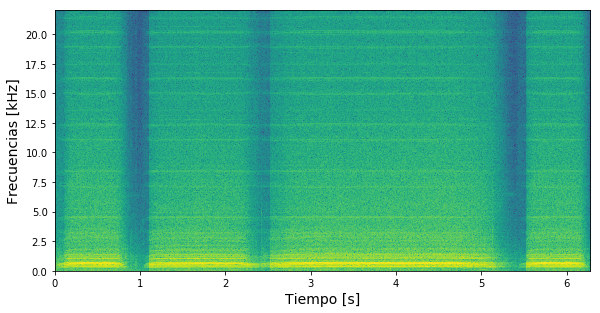

In [40]:
# y Graficamos
f, ax = plt.subplots(figsize=(9.6,4.8))
ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, duracion, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frecuencias [kHz]')
ax.set_xlabel('Tiempo [s]');


Así tenemos la información de frecuencias para cada instante de tiempo (discretizados). Vemos que alrededor de 1, 2.4, y 5.3 segundos hay zonas de (casi) silencio.

El módulo `scipy.signal` incluye una implementación de este procedimiento en la función `spectrogram`. Veamos como usarlo:

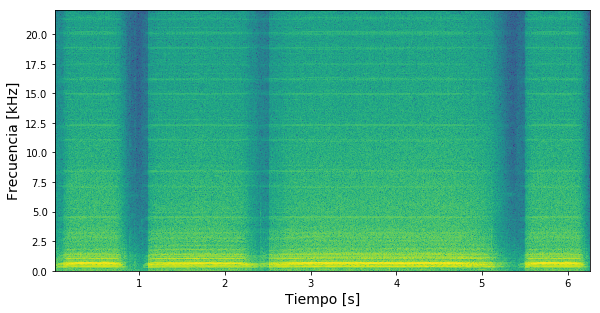

In [41]:
from scipy import signal

freqs, times, Sx = signal.spectrogram(audio1, fs=rate, window='hanning',
                                      nperseg=1024, noverlap=M - 100,
                                      detrend=False, scaling='spectrum')

f, ax = plt.subplots(figsize=(9.6,4.8))
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frecuencia [kHz]')
ax.set_xlabel('Tiempo [s]');


Analicemos brevemente otro audio diferente

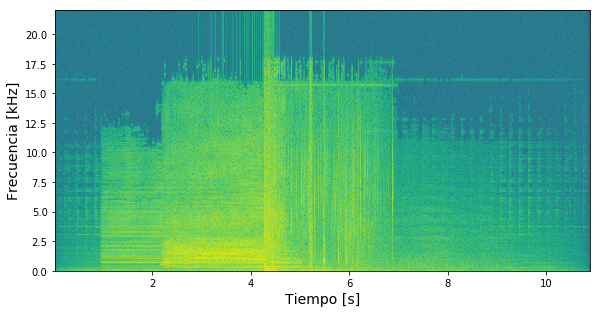

In [42]:
rate, audio = wavfile.read(join(pardir, 'data/',fname2))
audio2 = audio.mean(axis=1)

freqs, times, Sx = signal.spectrogram(audio2, fs=rate, window='hanning',
                                      nperseg=1024, noverlap=M - 100,
                                      detrend=False, scaling='spectrum')

f, ax = plt.subplots(figsize=(9.6,4.8))
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx+1.e-13), cmap='viridis')
ax.set_ylabel('Frecuencia [kHz]')
ax.set_xlabel('Tiempo [s]');


El audio dura alrededor de 10 segundos. Hay un sonido más o menos suave desde el primer segundo, después del segundo 2, empieza un sonido más intenso y grave. Luego, después del segundo número 4 aparece un sonido intenso que llega a frecuencias más altas que el resto del audio, y que luego termina más o menos abruptamente, quedando sólo el sonido de fondo hasta los siete segundos.

Escuchémoslo:

In [43]:
Audio(audio2, rate=rate)

**Nota sobre los gráficos**

Acá usamos la función `pcolormesh()` que sirve para hacer un gráfico en el plano (x,y) donde la intensidad (z) se especifica por colores. Para ello se utiliza una grilla rectangular, no necesariamente regular o equiespaciada.


In [45]:
np.info(ax.pcolormesh)

 pcolormesh(*args, **kwargs)

Create a pseudocolor plot with a non-regular rectangular grid.

Call signature::

    pcolor([X, Y,] C, **kwargs)

*X* and *Y* can be used to specify the corners of the quadrilaterals.

.. note::

   ``pcolormesh()`` is similar to :func:`~Axes.pcolor`. It's much
   faster and preferred in most cases. For a detailed discussion on
   the differences see
   :ref:`Differences between pcolor() and pcolormesh()
   <differences-pcolor-pcolormesh>`.

Parameters
----------
C : array_like
    A scalar 2-D array. The values will be color-mapped.

X, Y : array_like, optional
    The coordinates of the quadrilateral corners. The quadrilateral
    for ``C[i,j]`` has corners at::

        (X[i+1, j], Y[i+1, j])          (X[i+1, j+1], Y[i+1, j+1])
                              +--------+
                              | C[i,j] |
                              +--------+
            (X[i, j], Y[i, j])          (X[i, j+1], Y[i, j+1]),

    Note that the column index correspon

Nosotros lo usamos en la forma:
```python
pcolormesh(times, freqs, Sx)
```
Veamos, que forma tienen estas cantidades:

In [44]:
times.shape, freqs.shape, Sx.shape

((4800,), (513,), (513, 4800))